In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
%matplotlib inline

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [135]:
df.shape

(1338, 7)

In [136]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [137]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [138]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

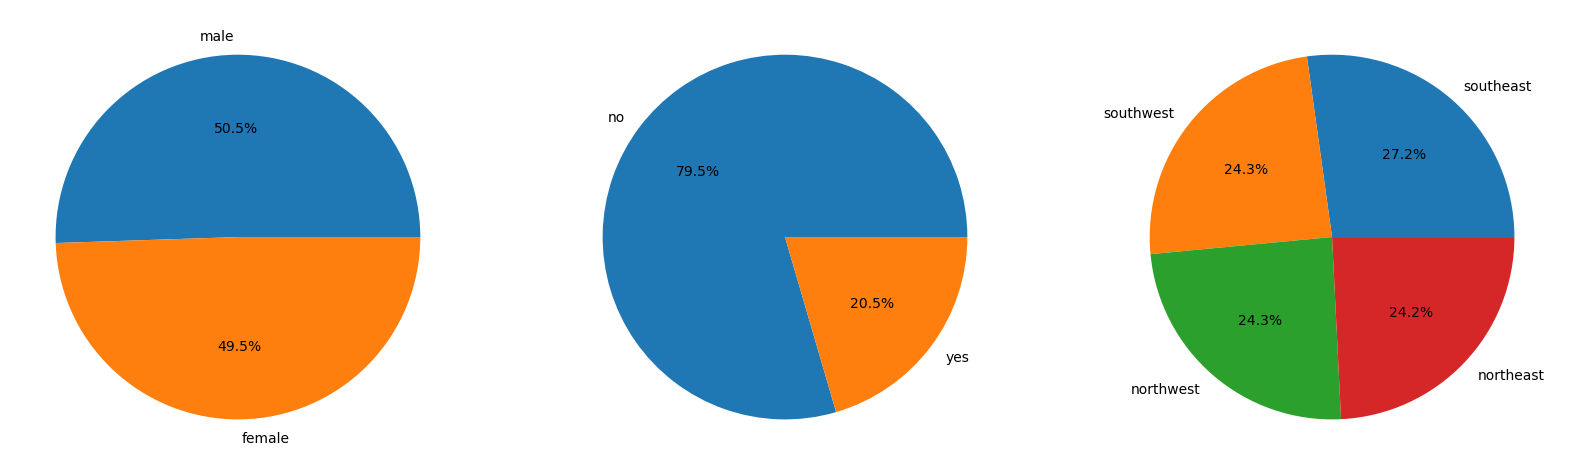

In [139]:
features = ['sex', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
 
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
 
plt.show()

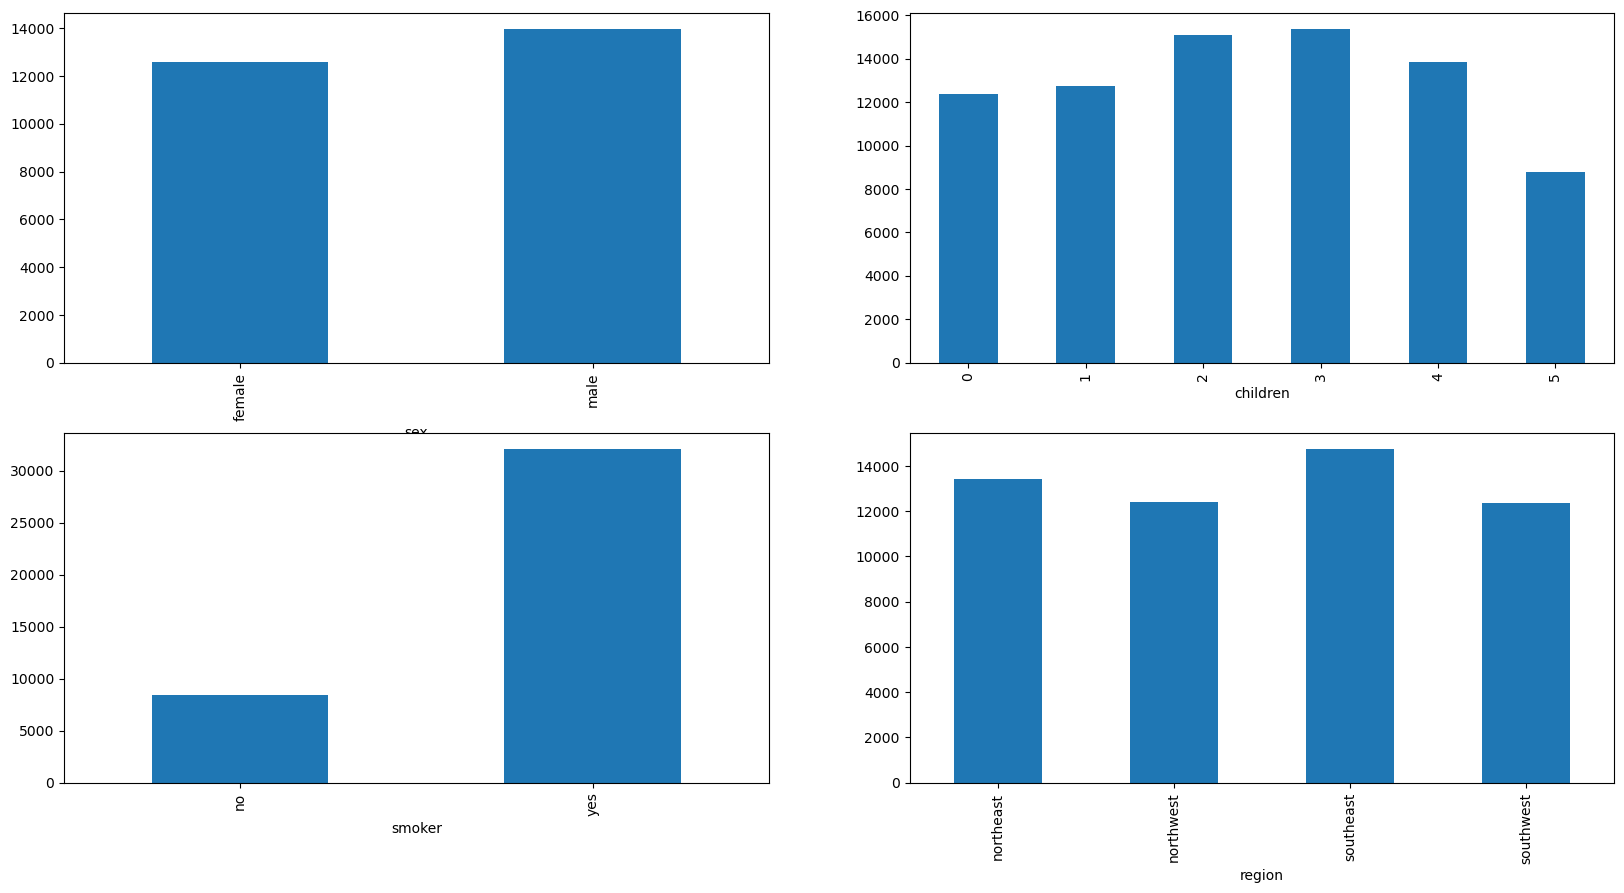

In [140]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['expenses'].plot.bar()
plt.show()

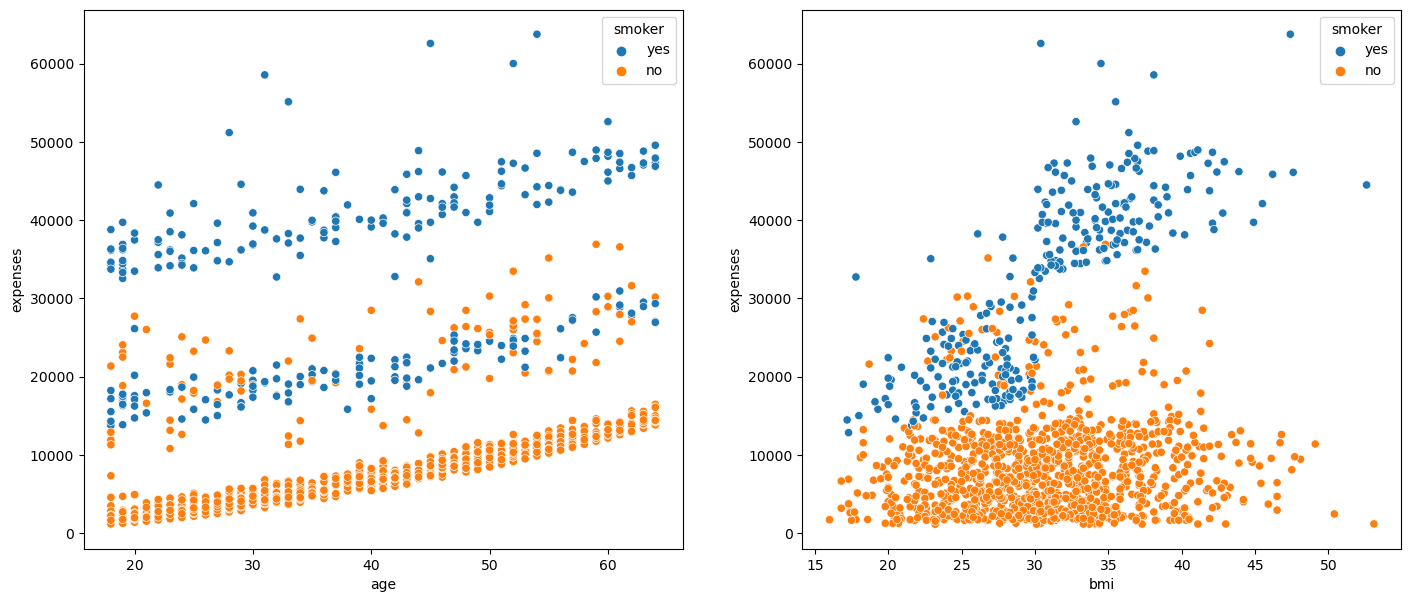

In [141]:
features = ['age', 'bmi']
 
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='expenses',
                   hue='smoker')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27064abbd30>,
 'caps': [<matplotlib.lines.Line2D at 0x27064b58310>,
 'boxes': [<matplotlib.lines.Line2D at 0x27064abbaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x27064b588b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27064b58b80>],
 'means': []}

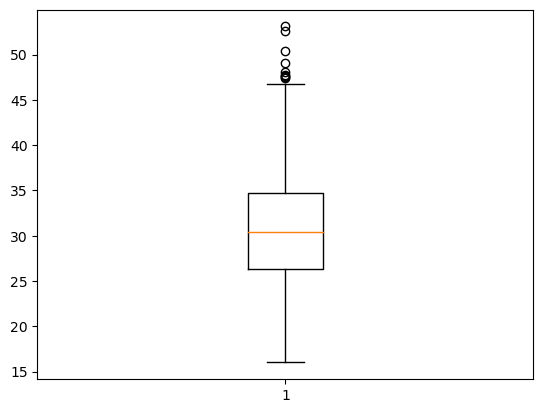

In [142]:
plt.boxplot(df.bmi)

In [143]:
Q3 = df.bmi.quantile(0.75)
Q2 = df.bmi.quantile(0.5)
Q1 = df.bmi.quantile(0.25)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
outlier = df[(df.bmi > upper_limit) | (df.bmi < lower_limit)]
print(upper_limit)
print(lower_limit)
outlier

47.300000000000004
13.699999999999998


,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [144]:
df3 = df[(df.bmi < upper_limit) & (df.bmi > lower_limit)]
df3

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [145]:
dummies= pd.get_dummies(df3.region)
dummies

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [146]:
df4 = df3.drop('region', axis=1)
df4 = pd.concat([df4, dummies], axis=1, ignore_index=False)
df4.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,16884.92,0,0,0,1
1,18,male,33.8,1,no,1725.55,0,0,1,0
2,28,male,33.0,3,no,4449.46,0,0,1,0
3,33,male,22.7,0,no,21984.47,0,1,0,0
4,32,male,28.9,0,no,3866.86,0,1,0,0


In [147]:
le = LabelEncoder()
df4.sex = le.fit_transform(df4.sex)
df4.smoker = le.fit_transform(df4.smoker)
df4.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


In [148]:
X = df4.drop('expenses', axis=1)
y = df4.expenses

from sklearn.decomposition import PCA
pca = PCA(0.99)
x_pca = pca.fit_transform(X)
x_pca

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [150]:
X_train.shape

(1063, 9)

In [151]:
y_train.shape

(1063,)

In [152]:
scores  = cross_val_score(LinearRegression(), X, y, cv=10)
scores.mean()

0.7437097151687713

In [153]:
scores  = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=10)
scores.mean()

0.8351318755650798

In [154]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=RandomForestRegressor(), 
                  param_grid= {
                      'n_estimators' : [100, 120, 160, 190, 210]
                   }, cv=10, return_train_score=False)
clf.fit(X, y)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.198931,0.004367,0.007000,1.785594e-06,100,{'n_estimators': 100},0.870432,0.832230,0.817234,0.728303,0.848525,0.892131,0.850013,0.785551,0.847101,0.864639,0.833616,0.044818,2
1,0.233752,0.004808,0.008100,8.307899e-04,120,{'n_estimators': 120},0.868151,0.833409,0.812832,0.729077,0.852802,0.889847,0.849642,0.783635,0.845202,0.862161,0.832676,0.044473,5
2,0.312900,0.004210,0.010000,1.784161e-07,160,{'n_estimators': 160},0.867136,0.830516,0.819955,0.723010,0.856450,0.889296,0.852431,0.787594,0.844887,0.864161,0.833544,0.045505,3
3,0.385775,0.015713,0.012524,1.073496e-03,190,{'n_estimators': 190},0.866738,0.834489,0.820231,0.730611,0.853845,0.888115,0.852191,0.783447,0.848000,0.862107,0.833977,0.043756,1
4,0.405582,0.004560,0.012860,4.568199e-04,210,{'n_estimators': 210},0.869689,0.829732,0.817390,0.725605,0.853826,0.892333,0.848859,0.787391,0.848046,0.861553,0.833442,0.045232,4


In [155]:
clf.best_params_

{'n_estimators': 190}

In [156]:
clf.best_score_

0.833977392321376

In [157]:
# from xgboost import XGBRegressor

model_params= {
    'linear':{
        'model' : LinearRegression(),
        'params':{
            
        }
    },
    
    'randomf':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators': [100,110,115,120]
        }
    },
    
    'svm':{
        'model' : SVR(),
        'params':{
            'C': [1,10,15],
            'kernel' : ['rbf', 'linear']
        }
    },
    
    'Lasso':{
        'model' : SVR(),
        'params':{
            'C': [1,10,15],
            'kernel' : ['rbf', 'linear']
        }
    },
    
    'Ridge':{
        'model' : Ridge(),
        'params':{
            
        }
    }
}

In [158]:
scores=[]
for model_name,mp in model_params.items():
    rs = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    rs.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score' : rs.best_score_,
        'best_parameters' : rs.best_params_
    })
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters'] )
df

,model,best_score,best_parameters
0,linear,0.746148,{}
1,randomf,0.836303,{'n_estimators': 100}
2,svm,0.063316,"{'C': 15, 'kernel': 'linear'}"
3,Lasso,0.063316,"{'C': 15, 'kernel': 'linear'}"
4,Ridge,0.746138,{}


In [159]:
df.best_parameters

0                               {}
1            {'n_estimators': 100}
2    {'C': 15, 'kernel': 'linear'}
3    {'C': 15, 'kernel': 'linear'}
4                               {}
Name: best_parameters, dtype: object

In [160]:
df.best_score.max()

0.8363031086652551

In [161]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8134273777385234

age	sex	bmi	children	smoker	expenses	northeast	northwest	southeast	southwest

In [170]:
y_pred = model.predict(X_test)
y_pred[0:10]

array([ 6035.5199 , 27712.8856 ,  2598.83625, 35711.7588 ,  5174.1176 ,
        6798.8436 ,  4839.5171 , 12396.3804 ,  6347.4759 ,  5478.4012 ])

In [171]:
y_test[0:10]

140     27375.90
1250    18648.42
1158     2459.72
689     34806.47
919      5245.23
44       6079.67
353     12404.88
649     12430.95
345      6184.30
305     19442.35
Name: expenses, dtype: float64

In [166]:
y_pred = model.predict([[25, 1, 29, 3, 1, 0,0,0,1]])
y_pred

C:\Users\Shreyas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([19852.5116])